# Formula 1 Data Analysis
## Importing the libraries declaring constants

In [12]:

import numpy as np
import numpy.typing as npt
from sklearn.linear_model import LinearRegression
import scipy
import os
import matplotlib.pyplot as plt
WING_SPAN = .585 # meters
WING_LEN = .115 # meters
WING_CHORD = .115 # Meters
CHORD_LEN = WING_LEN + 0
AREA_CHORD = CHORD_LEN**2
AREA_CHORD_CAR = 3 * AREA_CHORD
RADIUS = 400 / np.pi
POWER = 100 # hP


# Calibration

In [13]:
lift_force_voltage = np.array([-.5, -.41, -.31]).reshape((-1, 1))
drag_force_voltage = np.array([1.06, 1.16, 1.25]).reshape((-1, 1))
# lift_force_voltage = np.array([-.006, -.011, -.02, -.031, -.051, -.07, -.102, -.121, -.151, -.202]).reshape((-1, 1))
# drag_force_voltage = np.array([.009, .012, .021, .029, .047, 0.075, .093, .113, .142, .191]).reshape((-1, 1))
force = np.array([0, 5, 10])
# force = np.array([.5, 1, 2, 3, 5, 8, 10, 12, 15, 20])
lift_model = LinearRegression()
lift_model.fit(lift_force_voltage, force)
lift_coeff = lift_model.coef_
lift_inter = lift_model.intercept_

print(f"Model coefficient: {lift_model.coef_}, and intercept: {lift_model.intercept_}, and score: {lift_model.score(lift_force_voltage, force)}")

drag_model = LinearRegression()
drag_model.fit(drag_force_voltage, force)
drag_coeff = drag_model.coef_
drag_inter = drag_model.intercept_
print(f"Model coefficient: {drag_model.coef_}, and intercept: {drag_model.intercept_}, and score: {drag_model.score(drag_force_voltage, force)}")
def drag_force_value(voltage):
    return drag_coeff * voltage + drag_inter
def lift_force_value(voltage):
    return lift_coeff * voltage + lift_inter

Model coefficient: [52.58302583], and intercept: 26.38376383763838, and score: 0.9990774907749078
Model coefficient: [52.58302583], and intercept: -55.821033210332104, and score: 0.9990774907749078


# Import data

In [14]:
dict_height_to_data = {}
keys = os.listdir('data')
keys = sorted(keys)
for filename in keys:
    if filename.endswith('.csv'):
        height = filename.split('.')[0]
        data = np.genfromtxt('data/' + filename, delimiter=',', skip_header=1)
        data.dtype = [('Time_s', np.float64), ("Airspeed_ms", np.float64), ('Lift_Force_N', np.float64), ('Drag_Force_N', np.float64), ('Side_Force_N', np.float64)]
        dict_height_to_data[height] = data
print(dict_height_to_data["01mm"].dtype.names)


('Time_s', 'Airspeed_ms', 'Lift_Force_N', 'Drag_Force_N', 'Side_Force_N')


# Using Calibration to convert Volts to Force

In [15]:
for key, data in dict_height_to_data.items():
    for i, lift_force in enumerate(data["Lift_Force_N"]):
        data["Lift_Force_N"][i] = lift_force_value(lift_force)
        data_print = data["Lift_Force_N"][i]
    for i, drag_force in enumerate(data["Drag_Force_N"]):
        data["Drag_Force_N"][i] = drag_force_value(drag_force)
        data_print = data["Drag_Force_N"][i]

# Getting Indecies for the max airspeed for each trial

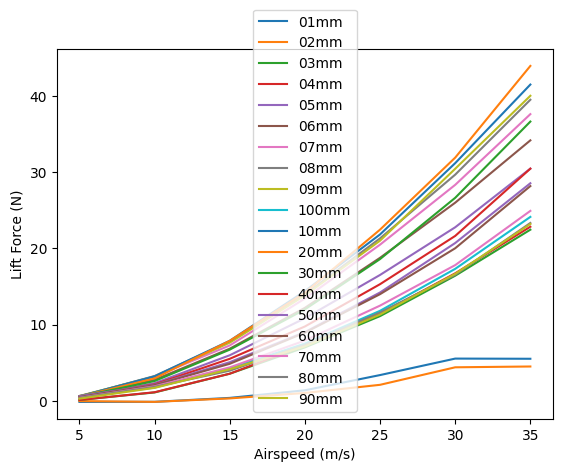

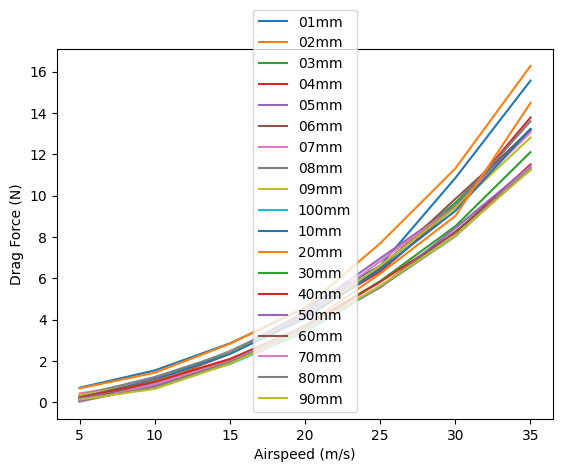

In [58]:
average_airspeed = [5, 10, 15, 20, 25, 30, 35]
drag_height = {}
lift_height = {}
count = 0
distance = 250 
for key, data in dict_height_to_data.items():
    airspeed = data["Airspeed_ms"]
    airspeed_5 = np.where(np.logical_and(4.9 < airspeed, airspeed < 5.1))
    airspeed_10 = np.where(np.logical_and(9.9 < airspeed, airspeed < 10.1))
    airspeed_15 = np.where(np.logical_and(14.9 < airspeed, airspeed < 15.1))
    airspeed_20 = np.where(np.logical_and(19.9 < airspeed, airspeed < 20.1))
    airspeed_25 = np.where(np.logical_and(24.9 < airspeed, airspeed < 25.1))
    airspeed_30 = np.where(np.logical_and(29.9 < airspeed, airspeed < 30.1))
    airspeed_35 = np.where(np.logical_and(34.9 < airspeed, airspeed < 35.1))
    lift = data["Lift_Force_N"]
    lift_5 = lift[airspeed_5]
    lift_10 = lift[airspeed_10]
    lift_15 = lift[airspeed_15]
    lift_20 = lift[airspeed_20]
    lift_25 = lift[airspeed_25]
    lift_30 = lift[airspeed_30]
    lift_35 = lift[airspeed_35]
    average_lift_5 = np.average(lift_5)
    average_lift_10 = np.average(lift_10)
    average_lift_15 = np.average(lift_15)
    average_lift_20 = np.average(lift_20)
    average_lift_25 = np.average(lift_25)
    average_lift_30 = np.average(lift_30)
    average_lift_35 = np.average(lift_35)
    average_lifts = [average_lift_5, average_lift_10, average_lift_15, average_lift_20, average_lift_25, average_lift_30, average_lift_35]
    lift_height[key] = average_lifts
    drag = data["Drag_Force_N"]
    drag_5 = drag[airspeed_5]
    drag_10 = drag[airspeed_10]
    drag_15 = drag[airspeed_15]
    drag_20 = drag[airspeed_20]
    drag_25 = drag[airspeed_25]
    drag_30 = drag[airspeed_30]
    drag_35 = drag[airspeed_35]
    average_drag_5 = np.average(drag_5)
    average_drag_10 = np.average(drag_10)
    average_drag_15 = np.average(drag_15)
    average_drag_20 = np.average(drag_20)
    average_drag_25 = np.average(drag_25)
    average_drag_30 = np.average(drag_30)
    average_drag_35 = np.average(drag_35)
    average_drag = [average_drag_5, average_drag_10, average_drag_15, average_drag_20, average_drag_25, average_drag_30, average_drag_35]
    drag_height[key] = average_drag

for key, value in lift_height.items():
    plt.plot(average_airspeed, value, label=key)
plt.legend()
plt.xlabel("Airspeed (m/s)")
plt.ylabel("Lift Force (N)")
plt.show()
for key, value in drag_height.items():
    plt.plot(average_airspeed, value, label=key)
plt.legend()
plt.xlabel("Airspeed (m/s)")
plt.ylabel("Drag Force (N)")
plt.show()

# Getting the Lift force for the corresponding max airspeed for each trial

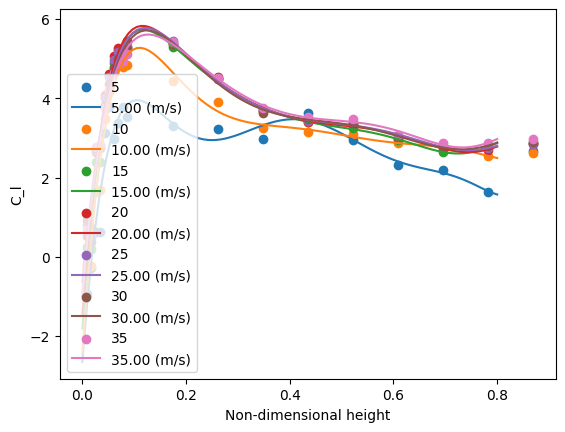

[0.6800021951455965, 0.5547633645761062, 2.771741024430526, 2.8195742868076445, 3.7617652559829207, 4.219334065143437, 4.644032309302615, 4.8772302941076076, 4.94159131352511, 2.978903465372898, 5.123484444046025, 5.425374629213287, 4.523631710372889, 3.7602618335738303, 3.524344260754825, 3.478541438213271, 3.076497179693451, 2.880442393626293, 2.863644320205819]


In [17]:
# converting lift_force to cl
airspeeds_Cl = [[] for i in range(len(average_airspeed))]
key_1 = list(lift_height.keys())
heights = []
for i, height in enumerate(key_1):
    list_height = list(height)
    if list_height[0] == 0:
        heights.append(float(list_height[1])*1e-3 / CHORD_LEN)
    elif len(list_height) > 4:
        heights.append(float(list_height[0] + list_height[1] + list_height[2]) * 1e-3 / CHORD_LEN)
    else:
        heights.append(float(list_height[0] + list_height[1]) * 1e-3 / CHORD_LEN)

count = 0
for key, lift_forces in lift_height.items():
    non_dem_height = heights[count]
    count += 1
    for i, lift_force in enumerate(lift_forces):
        C_l = 2* lift_force / ((average_airspeed[i]**2) * (CHORD_LEN**2))
        airspeeds_Cl[i].append((C_l, non_dem_height))
max_airspeed_cl = 0.

for i, airspeed in enumerate(average_airspeed):
    x_y = airspeeds_Cl[i]
    C_ls = [i[0] for i in x_y]
    if i == len(average_airspeed) - 1:
        max_airspeed_cl = C_ls
    h_cs = [i[1] for i in x_y]
    plt.scatter(h_cs, C_ls, label=airspeed)
    myline = np.linspace(0, .8, 100)
    mymodel = np.poly1d(np.polyfit(h_cs,C_ls,8))
    plt.plot(myline, mymodel(myline), label=f"{average_airspeed[i]:.2f} (m/s)")
plt.legend()
plt.xlabel("Non-dimensional height")
plt.ylabel("C_l")
plt.show()
print(max_airspeed_cl)

# Getting the Drag force for the corresponding max airspeed for each trial

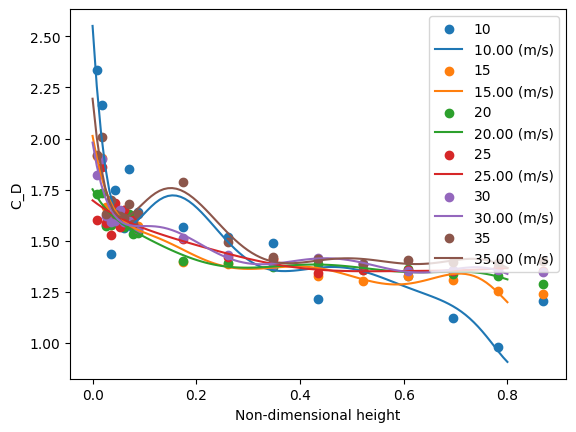

[1.9212783349236995, 2.009063166023867, 1.6315841125450967, 1.70062270769749, 1.6307144301607632, 1.6234717651177137, 1.6125725412340741, 1.678513882623631, 1.581138481466988, 1.4016153771282012, 1.6322396889116293, 1.7879646584406128, 1.4941757381827847, 1.420586379492258, 1.4111749068379928, 1.3883993667389323, 1.4055998729248662, 1.3961559958234075, 1.3891308127982698]


In [18]:
airspeeds_Cd = [[] for i in range(len(average_airspeed))]

count = 0
for key, drag_forces in drag_height.items():
    non_dem_height = heights[count]
    count += 1
    for i, drag_force in enumerate(drag_forces):
        C_l = 2* drag_force / ((average_airspeed[i]**2) * (CHORD_LEN**2))
        airspeeds_Cd[i].append((C_l, non_dem_height))
max_airspeed_cd = None 
max_airspeed_hcs = None
for i, airspeed in enumerate(average_airspeed):
    if i == 0:
        continue
    else:
        x_y = airspeeds_Cd[i]
        C_ds = [i[0] for i in x_y]
        h_cs = [i[1] for i in x_y]
        if i == len(average_airspeed) - 1:
            max_airspeed_cd = C_ds
            max_airspeed_hcs = h_cs
        plt.scatter(h_cs, C_ds, label=airspeed)
        myline = np.linspace(0, .8, 100)
        mymodel = np.poly1d(np.polyfit(h_cs,C_ds,8))
        plt.plot(myline, mymodel(myline), label=f"{average_airspeed[i]:.2f} (m/s)")
plt.legend()
plt.xlabel("Non-dimensional height")
plt.ylabel("C_D")
plt.show()
print(max_airspeed_cd)

# Fitting cornering Force to the data

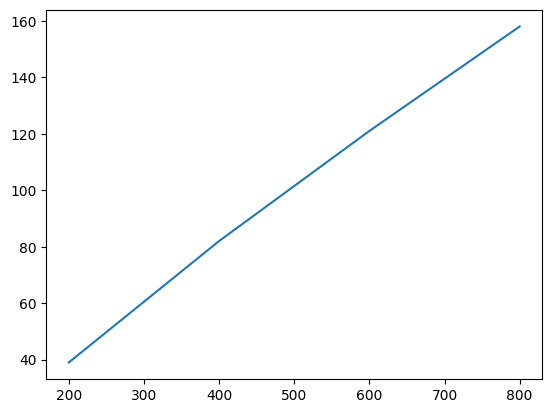

Downforce to cornering force coefficient: [52.58302583]
Downforce to cornering force intercept: -55.821033210332104


In [19]:
down_force = np.array([200, 400, 600, 800])
cornering_force = np.array([39, 82, 121, 158])
plt.plot(down_force, cornering_force)
plt.show()
down_force = down_force.reshape(-1, 1)
cornering_force = cornering_force.reshape(-1, 1)
down_v_corner = LinearRegression()
down_v_corner.fit(down_force, cornering_force)
down_coef = drag_model.coef_
down_intercept = drag_model.intercept_
print(f"Downforce to cornering force coefficient: {down_coef}")
print(f"Downforce to cornering force intercept: {down_intercept}")
def downforce_to_cornering(downforce):
    return down_v_corner.predict(downforce)

# Calculating the cornering force per tire needed

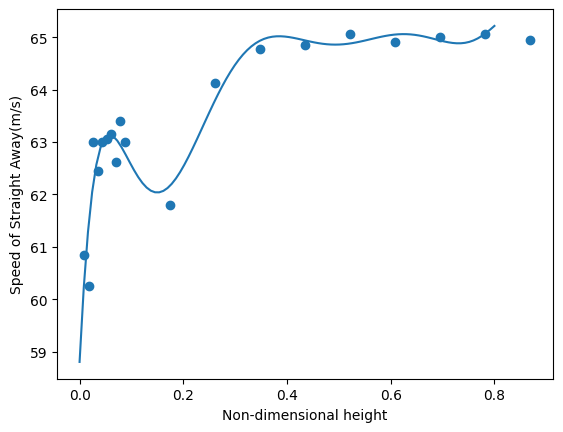

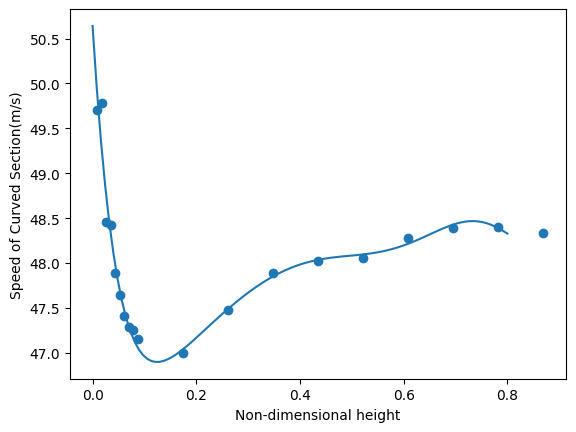

Min time: 28.824960612572536, at H/c: 0.7826086956521738


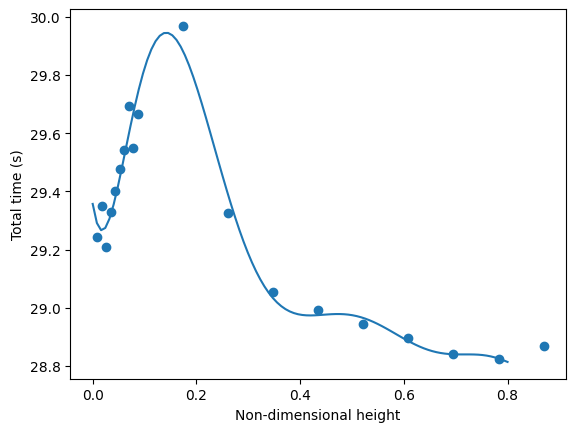

In [20]:
# Calculating lift of the wing at the an H/c of .8
length = 400 # m
mass_of_car = 200 #kg
planform_area = 3 # m^2
cd_car = 1
cl_car = .5
# V_straight
V_straight_values = []
V_curved_values = []
for i in  range(len(max_airspeed_hcs)):
    cd_wing = max_airspeed_cd[i]
    cl_wing = max_airspeed_cl[i]
    V_straight = 100 / (.5*(1 + cd_wing) * 1. * (planform_area + AREA_CHORD_CAR))**(1/3)
    force_car = mass_of_car * 9.8 
    V_curved_top = 2 * force_car*RADIUS*down_coef 
    V_curved_bottom = 2 * mass_of_car + RADIUS*1.*down_coef*cl_car*planform_area + RADIUS*1.*cl_wing*down_coef*AREA_CHORD_CAR
    V_curved = np.sqrt(V_curved_top / V_curved_bottom).item(0)
    V_straight_values.append(V_straight)
    V_curved_values.append(V_curved)

plt.scatter(max_airspeed_hcs, V_straight_values, label="Straight")
myline = np.linspace(0, .8, 100)
mymodel = np.poly1d(np.polyfit(max_airspeed_hcs,V_straight_values,8))
plt.plot(myline, mymodel(myline))
plt.xlabel("Non-dimensional height")
plt.ylabel("Speed of Straight Away(m/s)")
plt.show()

plt.scatter(max_airspeed_hcs, V_curved_values, label="Curved")
myline = np.linspace(0, .8, 100)
mymodel = np.poly1d(np.polyfit(max_airspeed_hcs,V_curved_values,8))
plt.plot(myline, mymodel(myline))
plt.xlabel("Non-dimensional height")
plt.ylabel("Speed of Curved Section(m/s)")
plt.show()

total_times_per_hcs = []
for i, hc in enumerate(max_airspeed_hcs):
    total_time = 2*(length / V_straight_values[i]) + 2*(np.pi*RADIUS / V_curved_values[i])
    total_times_per_hcs.append(total_time)

min_time = min(total_times_per_hcs)
min_index = total_times_per_hcs.index(min_time)
hcs_min_time = max_airspeed_hcs[min_index]
print(f"Min time: {min_time}, at H/c: {hcs_min_time}")

plt.scatter(max_airspeed_hcs, total_times_per_hcs)
myline = np.linspace(0, .8, 100)
mymodel = np.poly1d(np.polyfit(max_airspeed_hcs,total_times_per_hcs,8))
plt.plot(myline, mymodel(myline))
plt.xlabel("Non-dimensional height")
plt.ylabel("Total time (s)")
plt.show()



# Uncertainty Calculations

In [57]:
from IPython.display import display, Math, Latex
import array_to_latex as a2l
import scipy.stats as stats
# uncertainty of straight away
print(f"lift_coeff: {lift_coeff}")
table_of_uncertainty = []
for i, hcs in enumerate(max_airspeed_hcs):
    drag_coefficient = max_airspeed_cd[i]
    
    lift_coefficient = max_airspeed_cl[i]
    airspeed = 35 # m/s
    top_sub = lift_coefficient * RADIUS*down_coef
    top_sub = top_sub.item(0)
    partial_vs_vinf = (2**(5/3)*POWER)/ (3*(drag_coefficient)**(1/3)*(airspeed)**(1/3))
    # print(f"partial_vs_vinf: {partial_vs_vinf}")
    partial_vs_fv = (2**(2/3)*POWER*airspeed**(2/3))/(3*(drag_coefficient)**(4/3))
    # print(f"partial_vs_fv: {partial_vs_fv}")
    partial_vc_vinf = -((np.sqrt(2)*top_sub*RADIUS*9.8*mass_of_car)
                       /(AREA_CHORD_CAR*np.sqrt((down_coef*RADIUS*9.81*mass_of_car)/
                        (top_sub)/(AREA_CHORD_CAR*airspeed**2))*
                         (top_sub/(planform_area*airspeed**2)+planform_area*cl_car*down_coef*RADIUS+2*mass_of_car)**2*airspeed**3))
    partial_vc_fv_top = np.sqrt(2)*down_coef*lift_coeff*RADIUS**2*9.8*mass_of_car
    partial_vc_fv_bottom_1 = AREA_CHORD_CAR * airspeed**2*((top_sub)/(AREA_CHORD_CAR*airspeed**2) + planform_area*cl_car*down_coef*RADIUS+2*mass_of_car)**2
    partial_vc_fv_bottom_2 = np.sqrt((down_coef*RADIUS*9.81*mass_of_car)/(top_sub/(planform_area*airspeed**2)+planform_area*lift_coeff*down_coef * RADIUS+2*mass_of_car))
    partial_vc_fv = partial_vc_fv_top/(partial_vc_fv_bottom_1*partial_vc_fv_bottom_2)
    vs_uncer_prop = np.sqrt((partial_vs_vinf*.01)**2 + (partial_vs_fv*.02)**2 )
    vc_uncer_prop = np.sqrt((partial_vc_vinf*.01)**2 + (partial_vc_fv*.02)**2 + (partial_vc_fv*.2)**2)
    partial_lt_vc = -2*length/(V_curved_values[i]**2)
    partial_lt_vs = -2*length/(V_straight_values[i]**2)
    prop_lt_uncer = np.sqrt((partial_lt_vc*vc_uncer_prop)**2 + (partial_lt_vs*vs_uncer_prop)**2)
    table_of_uncertainty.append([hcs, vs_uncer_prop, vc_uncer_prop, prop_lt_uncer])
np_table_of_uncertainty = np.array(table_of_uncertainty)#dtype=[('Non-Dimensional Height', 'f8'), ('Uncertainty of VS', 'f8'), ('Uncertaitny of VC', 'f8'), ('Uncertaity of Lap-Time', 'f8')])
display(np_table_of_uncertainty)
a2l.to_ltx(np_table_of_uncertainty, frmt = '{:6.2f}', arraytype='bmatrix')
laptimes = np_table_of_uncertainty[:,3]
print(f"laptimes: {laptimes}")
confidence_interval = stats.t.interval(0.95, len(laptimes)-1, loc=np.mean(laptimes), scale=stats.sem(laptimes))
print(f"confidence_interval: {confidence_interval}")


lift_coeff: 52.58302583025831


array([[0.00869565, 4.7479602 , 1.31268645, 1.11063484],
       [0.0173913 , 4.47401012, 1.31699567, 1.07387875],
       [0.02608696, 5.90155127, 1.24373197, 1.26283508],
       [0.03478261, 5.58481593, 1.2422192 , 1.22123786],
       [0.04347826, 5.90574133, 1.21297543, 1.26312985],
       [0.05217391, 5.94083948, 1.19914456, 1.26759705],
       [0.06086957, 5.99435167, 1.18651785, 1.27447427],
       [0.06956522, 5.68293951, 1.17966929, 1.23356903],
       [0.07826087, 6.1535197 , 1.17778957, 1.29517176],
       [0.86956522, 7.22465182, 1.23720013, 1.4341724 ],
       [0.08695652, 5.89839621, 1.17250146, 1.26177014],
       [0.17391304, 5.22470131, 1.163803  , 1.17286678],
       [0.26086957, 6.63489291, 1.19007715, 1.35782261],
       [0.34782609, 7.09645315, 1.21302127, 1.41753501],
       [0.43478261, 7.15954942, 1.22024641, 1.42569536],
       [0.52173913, 7.31638119, 1.22165664, 1.44581806],
       [0.60869565, 7.19739096, 1.23414081, 1.43065403],
       [0.69565217, 7.2622985 ,

\begin{bmatrix}
    0.01 &    4.75 &    1.31 &    1.11\\
    0.02 &    4.47 &    1.32 &    1.07\\
    0.03 &    5.90 &    1.24 &    1.26\\
    0.03 &    5.58 &    1.24 &    1.22\\
    0.04 &    5.91 &    1.21 &    1.26\\
    0.05 &    5.94 &    1.20 &    1.27\\
    0.06 &    5.99 &    1.19 &    1.27\\
    0.07 &    5.68 &    1.18 &    1.23\\
    0.08 &    6.15 &    1.18 &    1.30\\
    0.87 &    7.22 &    1.24 &    1.43\\
    0.09 &    5.90 &    1.17 &    1.26\\
    0.17 &    5.22 &    1.16 &    1.17\\
    0.26 &    6.63 &    1.19 &    1.36\\
    0.35 &    7.10 &    1.21 &    1.42\\
    0.43 &    7.16 &    1.22 &    1.43\\
    0.52 &    7.32 &    1.22 &    1.45\\
    0.61 &    7.20 &    1.23 &    1.43\\
    0.70 &    7.26 &    1.24 &    1.44\\
    0.78 &    7.31 &    1.24 &    1.45
\end{bmatrix}
laptimes: [1.11063484 1.07387875 1.26283508 1.22123786 1.26312985 1.26759705
 1.27447427 1.23356903 1.29517176 1.4341724  1.26177014 1.17286678
 1.35782261 1.41753501 1.42569536 1.44581806 1.43